In [2]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram
from qiskit import Aer
from qiskit import QuantumCircuit, QuantumRegister
import numpy as np

n =  6


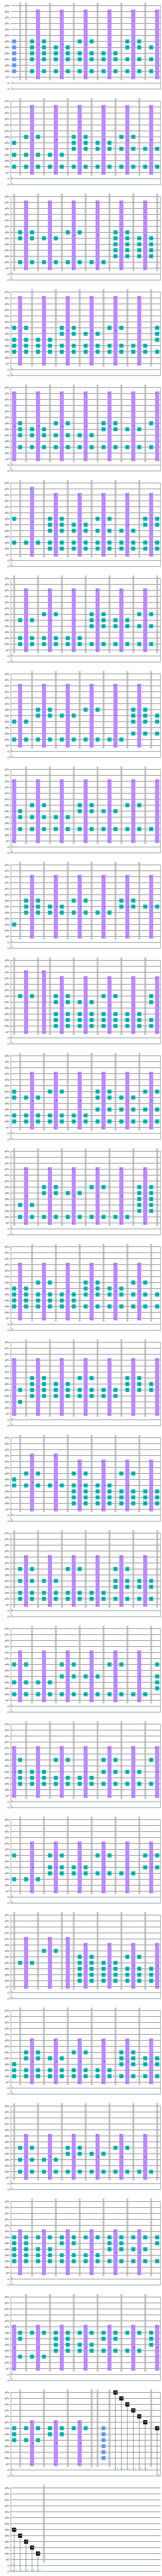

In [5]:
s = '110101'

n = len(s)
print('n = ', n)

im = np.zeros((int(2**n / 2), n))
for k in range(int(2**n / 2)):
    aux = bin(int(k))[2:].zfill(n)
    
    for j in range(n):
        if aux[j] == '0':
            im[k, j] = 0
        else: 
            im[k, j] = 1      

def xor(s, x):
    y = np.zeros(n)
    for k in range(n):
        if((s[k] == '0' and x[k] == '0') or (s[k] == '1' and x[k] == '1')):
            y[k] = 0
        else:
            y[k] = 1
    return y

f = 2 * np.ones((2**n, n))

cont = 0
for k in range(2**n):
    yo = xor(s, bin(int(k))[2:].zfill(n))
    y = 0
    for j in range(n):
        if yo[j] == 1:
            y += 2**(n - j - 1)
        
    if(f[k, 0]) == 2:
        f[k, :] = im[cont, :]
        f[y, :] = im[cont, :]
        cont += 1
        
Q1 = QuantumRegister(n)
Q2 = QuantumRegister(n)
C1 = ClassicalRegister(n)
C2 = ClassicalRegister(n)

if n > 4:
    Qa = QuantumRegister(1)
    circuito = QuantumCircuit(Q1, Q2, Qa, C1, C2)
else:
    circuito = QuantumCircuit(Q1, Q2, C1, C2)

circuito.h(Q2)
circuito.barrier()
circuito.barrier()

for j in range(n):
    for k in range(len(f)):
        if f[k, j] == 1:
            x = bin(int(k))[2:].zfill(n)
            for m in range(n):
                if x[m] == '0':
                    circuito.x(Q2[n - m - 1])            
            
            if n > 4:
                circuito.mct(Q2, Q1[j], Qa, mode='advanced')
            else:
                circuito.mct(Q2, Q1[j], None, mode='advanced')
            
            for m in range(n):
                if x[m] == '0':
                    circuito.x(Q2[n - m - 1])
            
            circuito.barrier()           
        
circuito.barrier()

circuito.h(Q2)
circuito.barrier()

circuito.measure(Q1, C1)
circuito.barrier()

circuito.measure(Q2, C2)
circuito.barrier()

circuito.draw(output='mpl')

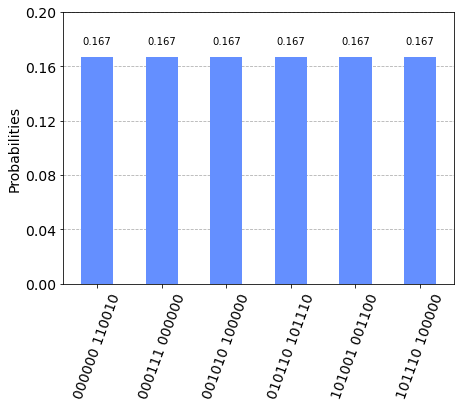

In [6]:
simulador = BasicAer.get_backend('qasm_simulator')
job = execute(circuito, simulador, shots=n)
resultado = job.result()
contagem = resultado.get_counts()
plot_histogram(contagem)